![](Slide1.PNG)

![](Slide2.PNG)

![](Slide3.png)

## Extract image chips for Surface-to-Air Missile (SAM) sites

In [1]:
from arcgis import *
from arcgis.mapping import MapImageLayer
import pandas as pd

### 1. Labeled data

In [2]:
gis = GIS(profile='deldev')

items = gis.content.search('title:"SAM_Sites"', outside_org=True)

<Item title:"Final_Site_Sam_Schoenmann" type:Feature Layer Collection owner:Schoes34>
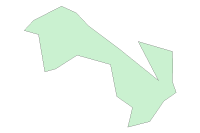

<Item title:"SAM_Site99" type:Feature Layer Collection owner:dbooth_TechsupportUK>
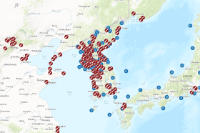

<Item title:"Sam Sites" type:Web Map owner:deldev>

<Item title:"deh_field_use - SAM Sites" type:Feature Layer Collection owner:khalid_elmi>

<Item title:"SAM_Sites" type:Feature Layer Collection owner:dbooth_TechsupportUK>
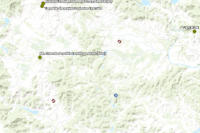

<Item title:"Sam's Club Site" type:Web Map owner:PatrickForrest>
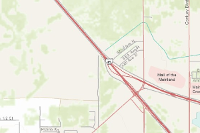

In [7]:
for item in items:
    display(item)

In [4]:
sam_sites = items[1]
df = sam_sites.layers[0].query().df

### 2. High Resolution Imagery - Esri World Imagery

<Item title:"World Imagery" type:Map Image Layer owner:esri>
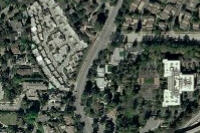

In [5]:
imagery = gis.content.search('title:World Imagery', 'Map Service', outside_org=True)[0]
lyr = MapImageLayer.fromitem(imagery)
imagery

### 3. Extract image chips

In [6]:
for index, row in tqdm(df.iterrows()):
    imgid = row['OBJECTID']
    g = row['SHAPE']
    x, y = g['x'] , g['y'] 
    g['spatialReference'] = df.sr
    try:
        ext1 = (x - 300, y - 300, x +  300, y + 300)  # SAM site
        ext2 = (x - 900, y - 300, x -  300, y + 300)  # left
        ext3 = (x + 900, y - 300, x + 1500, y + 300)  # right
        ext4 = (x - 300, y - 600, x +  300, y - 1200) # below
        
        lyr.export_map(ext1, 102100, '224,224', f='image', format='jpg', save_folder='data\\images\\sam', save_file='{}.jpg'.format(row['OBJECTID']))
        lyr.export_map(ext2, 102100, '224,224', f='image', format='jpg', save_folder='data\\images\\ground', save_file='{}_1.jpg'.format(row['OBJECTID']))
        lyr.export_map(ext3, 102100, '224,224', f='image', format='jpg', save_folder='data\\images\\ground', save_file='{}_2.jpg'.format(row['OBJECTID']))
        lyr.export_map(ext4, 102100, '224,224', f='image', format='jpg', save_folder='data\\images\\ground', save_file='{}_3.jpg'.format(row['OBJECTID']))
    except Exception as e:
        print('Error with {}'.format(imgid))
        

200it [28:16,  8.48s/it]
